In the data preprocessing phase, I began by checking for missing values and found that the dataset was complete, so no imputation was necessary. I also reviewed the presence of outliers and decided to keep them, as they seemed to reflect realistic financial behavior, such as high transaction volumes or large late payments, which may be relevant to customer churn.

I created new features at the customer level, including transaction count, product count, tenure in days, late payment amount, and customer score. These features were chosen to reflect customer engagement, product diversity, financial reliability, and overall value.

In [1]:
import numpy as np
import pandas as pd

In [2]:
bank = pd.read_excel("Banking_Dataset.xlsx")
bank

,TransactionID,CustomerID,TransactionDate,TransactionType,Amount,ProductCategory,ProductSubcategory,BranchCity,BranchLat,BranchLong,Channel,Currency,CreditCardFees,InsuranceFees,LatePaymentAmount,CustomerScore,MonthlyIncome,CustomerSegment,RecommendedOffer
0,1,8270,2025-01-29,Card Payment,6980.185223,Checking Account,Gold,Seville,37.3891,-5.9845,Branch,EUR,0.0,0.00,0.0,839,5767.68,Middle Income Segment,Mid-tier Savings Booster
1,2,1860,2023-02-10,Deposit,10786.371854,Mortgage,Gold,Murcia,37.9847,-1.1287,Branch,EUR,0.0,0.00,0.0,683,2441.00,Low Income Segment,Financial Literacy Program Access
2,3,6390,2024-03-07,Transfer,3982.761111,Loan,Platinum,Malaga,36.7213,-4.4214,ATM,EUR,0.0,92.46,0.0,500,9957.08,High Income Segment,Premium Investment Services
3,4,6191,2023-07-04,Withdrawal,12408.644136,Mortgage,Standard,Seville,37.3891,-5.9845,ATM,EUR,0.0,0.00,0.0,392,1545.80,Low Income Segment,Financial Literacy Program Access
4,5,6734,2025-02-05,Fee,1868.260998,Checking Account,Platinum,Murcia,37.9847,-1.1287,Mobile,USD,0.0,0.00,0.0,368,5825.27,Middle Income Segment,Mid-tier Savings Booster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,4558,2024-12-01,Deposit,8762.456869,Loan,Standard,Bilbao,43.2630,-2.9350,Mobile,EUR,0.0,45.64,0.0,523,9088.46,High Income Segment,Premium Investment Services
19996,19997,6293,2023-12-23,Card Payment,458.183543,Savings Account,Gold,Murcia,37.9847,-1.1287,ATM,USD,0.0,0.00,0.0,480,7683.08,High Income Segment,Premium Investment Services
19997,19998,9890,2023-07-23,Card Payment,1251.610492,Checking Account,Gold,Murcia,37.9847,-1.1287,ATM,EUR,0.0,0.00,0.0,524,9637.10,High Income Segment,Premium Investment Services
19998,19999,3853,2023-05-13,Fee,6065.079429,Loan,Gold,Malaga,36.7213,-4.4214,ATM,EUR,0.0,88.54,0.0,520,2449.43,Low Income Segment,Financial Literacy Program Access


In [3]:
bank.isnull().sum()

TransactionID         0
CustomerID            0
TransactionDate       0
TransactionType       0
Amount                0
ProductCategory       0
ProductSubcategory    0
BranchCity            0
BranchLat             0
BranchLong            0
Channel               0
Currency              0
CreditCardFees        0
InsuranceFees         0
LatePaymentAmount     0
CustomerScore         0
MonthlyIncome         0
CustomerSegment       0
RecommendedOffer      0
dtype: int64

In [4]:
bank.describe()

,TransactionID,CustomerID,TransactionDate,Amount,BranchLat,BranchLong,CreditCardFees,InsuranceFees,LatePaymentAmount,CustomerScore,MonthlyIncome
count,20000.000000,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,5485.626000,2024-03-11 16:52:58.080000256,5050.355118,39.769383,-2.150508,5.219896,9.983711,16.654402,575.297450,5484.947090
min,1.000000,1000.000000,2023-01-01 00:00:00,8.275197,36.721300,-5.984500,0.000000,0.000000,0.000000,300.000000,1000.860000
25%,5000.750000,3218.750000,2023-08-09 00:00:00,2209.771959,37.389100,-4.421400,0.000000,0.000000,0.000000,437.000000,3224.785000
50%,10000.500000,5503.000000,2024-03-11 00:00:00,4382.682068,39.469900,-1.128700,0.000000,0.000000,0.000000,577.000000,5473.545000
75%,15000.250000,7728.000000,2024-10-17 00:00:00,7350.925301,41.387400,-0.889100,0.000000,0.000000,0.000000,715.000000,7736.802500
max,20000.000000,9998.000000,2025-05-20 00:00:00,14895.170734,43.263000,2.168600,49.990000,99.950000,199.980000,849.000000,9998.880000
std,5773.647028,2600.877312,NaN,3526.028326,2.150999,2.444790,12.221252,23.716191,44.109067,159.418177,2601.897479


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TransactionID       20000 non-null  int64         
 1   CustomerID          20000 non-null  int64         
 2   TransactionDate     20000 non-null  datetime64[ns]
 3   TransactionType     20000 non-null  object        
 4   Amount              20000 non-null  float64       
 5   ProductCategory     20000 non-null  object        
 6   ProductSubcategory  20000 non-null  object        
 7   BranchCity          20000 non-null  object        
 8   BranchLat           20000 non-null  float64       
 9   BranchLong          20000 non-null  float64       
 10  Channel             20000 non-null  object        
 11  Currency            20000 non-null  object        
 12  CreditCardFees      20000 non-null  float64       
 13  InsuranceFees       20000 non-null  float64   

In [6]:
bank.groupby(["CustomerSegment"])["CustomerID"].count()

CustomerSegment
High Income Segment      6626
Low Income Segment       4489
Middle Income Segment    8885
Name: CustomerID, dtype: int64

In [7]:
income= bank.groupby(["CustomerSegment"])["MonthlyIncome"].agg(
    count='count',
    min_income='min',
    max_income='max',
    avg_income='mean',
    median_income='median',
    std_dev='std'
).reset_index()


In [8]:
income

,CustomerSegment,count,min_income,max_income,avg_income,median_income,std_dev
0,High Income Segment,6626,7002.08,9998.88,8508.897564,8525.77,870.038815
1,Low Income Segment,4489,1000.86,2999.98,2005.805244,2003.85,578.829111
2,Middle Income Segment,8885,3000.15,6999.93,4987.611344,4998.27,1149.930117


In [9]:
summary_table = bank.describe().T
summary_table = summary_table[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
summary_table.columns = ['Mean', 'Std Dev', 'Min', '25th %ile', 'Median', '75th %ile', 'Max']
summary_table.round(2)

,Mean,Std Dev,Min,25th %ile,Median,75th %ile,Max
TransactionID,10000.5,5773.647028,1.0,5000.75,10000.5,15000.25,20000.0
CustomerID,5485.626,2600.877312,1000.0,3218.75,5503.0,7728.0,9998.0
TransactionDate,2024-03-11 16:52:58.080000256,NaN,2023-01-01 00:00:00,2023-08-09 00:00:00,2024-03-11 00:00:00,2024-10-17 00:00:00,2025-05-20 00:00:00
Amount,5050.355118,3526.028326,8.275197,2209.771959,4382.682068,7350.925301,14895.170734
BranchLat,39.769383,2.150999,36.7213,37.3891,39.4699,41.3874,43.263
BranchLong,-2.150508,2.44479,-5.9845,-4.4214,-1.1287,-0.8891,2.1686
CreditCardFees,5.219896,12.221252,0.0,0.0,0.0,0.0,49.99
InsuranceFees,9.983711,23.716191,0.0,0.0,0.0,0.0,99.95
LatePaymentAmount,16.654402,44.109067,0.0,0.0,0.0,0.0,199.98
CustomerScore,575.29745,159.418177,300.0,437.0,577.0,715.0,849.0


In [10]:
transaction_count = bank.groupby("CustomerID")["TransactionID"].count()

In [11]:
product_count = bank.groupby("CustomerID")["ProductCategory"].nunique()

In [12]:
tenure = bank.groupby("CustomerID")["TransactionDate"].agg(lambda x: (x.max() - x.min()).days)

In [13]:
late_payment = bank.groupby("CustomerID")["LatePaymentAmount"].sum()

In [14]:
avg_score = bank.groupby("CustomerID")["CustomerScore"].mean()

In [15]:
features_df = pd.DataFrame({
    "transaction_count": transaction_count,
    "product_count": product_count,
    "tenure_days": tenure,
    "late_payment": late_payment,
    "CustomerScore": avg_score
})

In [16]:
features_df["late_payment"] = -features_df["late_payment"]

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized = pd.DataFrame(scaler.fit_transform(features_df), columns=features_df.columns, index=features_df.index)


features_df["logic_score"] = (
    0.25 * normalized["transaction_count"] +
    0.2 * normalized["product_count"] +
    0.25 * normalized["tenure_days"] +
    0.15 * normalized["CustomerScore"] +
    0.15 * normalized["late_payment"] 
)

I designed features such as transaction count, product diversity, tenure, late payments, and average customer score to capture customer behavior patterns, which I then used both for clustering customers into "loyal" and "risky" groups and for classifying churn using Logistic Regression, Random Forest, and XGBoost models.

In this project, I aimed to achieve two main goals: first, to engineer meaningful features that could help cluster customers into groups like "loyal" and "risky," and second, to use those features to classify churn (defined as no activity for over 90 days) using models like Logistic Regression, Random Forest, and XGBoost.

In [18]:
features_df

,transaction_count,product_count,tenure_days,late_payment,CustomerScore,logic_score
CustomerID,,,,,,
1000,1,1,0,-0.00,399.000000,0.177049
1001,5,3,731,-0.00,445.000000,0.600645
1002,2,2,106,-0.00,650.000000,0.351229
1003,1,1,0,-0.00,821.000000,0.292350
1004,3,3,216,-0.00,671.666667,0.463904
...,...,...,...,...,...,...
9994,2,2,101,-0.00,569.500000,0.327791
9995,4,4,263,-114.76,536.750000,0.492367
9996,3,3,436,-0.00,419.333333,0.458471


In [19]:
import datetime

last_date = bank["TransactionDate"].max()
churned_customers = bank.groupby("CustomerID")["TransactionDate"].max()
churn_flag = (last_date - churned_customers).dt.days > 90

features_df["churn"] = churn_flag.astype(int)  


In [20]:
features_df

,transaction_count,product_count,tenure_days,late_payment,CustomerScore,logic_score,churn
CustomerID,,,,,,,
1000,1,1,0,-0.00,399.000000,0.177049,1
1001,5,3,731,-0.00,445.000000,0.600645,0
1002,2,2,106,-0.00,650.000000,0.351229,1
1003,1,1,0,-0.00,821.000000,0.292350,0
1004,3,3,216,-0.00,671.666667,0.463904,1
...,...,...,...,...,...,...,...
9994,2,2,101,-0.00,569.500000,0.327791,1
9995,4,4,263,-114.76,536.750000,0.492367,1
9996,3,3,436,-0.00,419.333333,0.458471,0


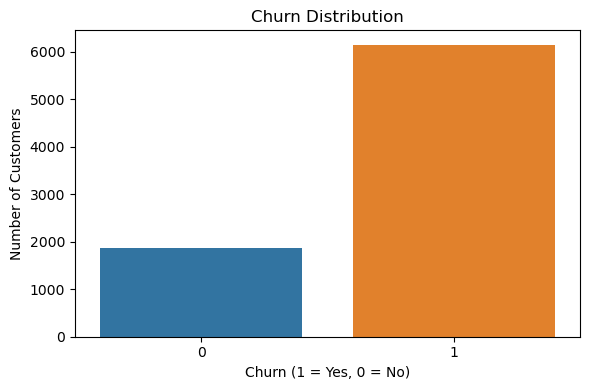

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=features_df)
plt.title('Churn Distribution')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

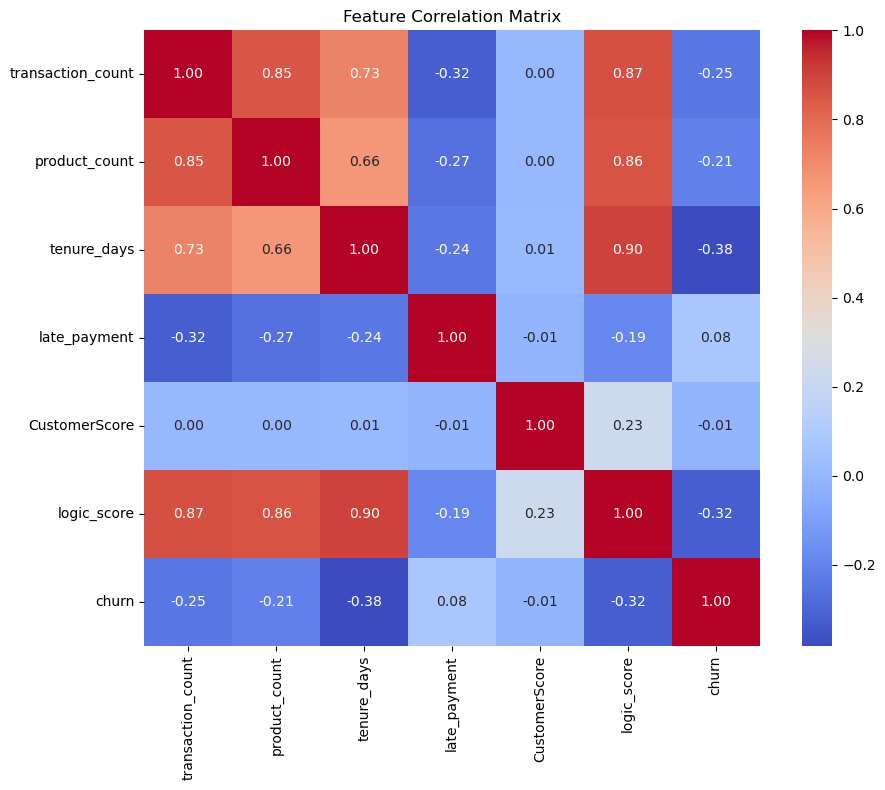

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(features_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X = features_df.drop(columns=["churn"])
y = features_df["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

For this project, I began by examining the dataset for missing values and found none, so no imputation or deletion was required. Outliers were retained intentionally, as they reflect genuine customer behaviors such as large payments or extended inactivity, which are important for churn analysis.

Since my dataset did not contain categorical features, there was no need for encoding. Instead, I focused on constructing meaningful numerical features that capture customer diversity and behavior—such as transaction count, product count (as a proxy for diversity), tenure, late payments, and average customer score. These features were created at the customer level to reflect long-term engagement.

All features were then normalized using MinMaxScaler to bring them to the same scale, which is important for clustering and models like logistic regression. I also created a composite metric called logic_score, which combines the normalized values using custom weights to reflect business importance.

Feature selection was not required, as the final feature set was already small, interpretable, and designed with domain relevance in mind.

In [26]:
print("\nMinimum values in each column:\n", normalized.min())
print("\nMaximum values in each column:\n", normalized.max())


Minimum values in each column:
 transaction_count    0.0
product_count        0.0
tenure_days          0.0
late_payment         0.0
CustomerScore        0.0
dtype: float64

Maximum values in each column:
 transaction_count    1.0
product_count        1.0
tenure_days          1.0
late_payment         1.0
CustomerScore        1.0
dtype: float64


For this project, I used MinMaxScaler to normalize the feature set that was used for clustering and scoring. I chose this approach because KMeans clustering is sensitive to the scale of the data. Since it relies on distance calculations, having features on different scales could bias the results. MinMaxScaler transforms all numeric features into a common range between zero and one, which ensures equal contribution from each feature.

After applying the scaler, I verified the transformation by checking the minimum and maximum values of each column. The results showed that all values were now between zero and one. This confirmed that the normalization was successful for features like transaction count, product count, tenure days, late payment, and customer score.

Although some of the classification models I plan to use later, such as decision trees and random forests, do not require feature scaling, I decided to apply it anyway for consistency. This also allowed me to compute a logic score that combines multiple features without one outweighing another. Scaling helped maintain fairness and interpretability during the clustering phase.

After completing the preprocessing steps, I focused on engineering meaningful features that would help capture the diversity and behavior of each customer. These included transaction count, product count, tenure, late payment history, and average customer score. I normalized the features using MinMaxScaler to ensure that all variables were on the same scale—an important step for clustering algorithms and some classification models. No missing values were found, and I retained outliers because they reflected realistic customer behavior that could influence churn. I also created a composite metric called logic_score to combine the influence of all behavioral features into a single value using weighted importance.

These preprocessing actions helped shape the dataset for two modeling goals those are clustering and churn prediction. Clustering customers into groups like “loyal” and “risky” helped uncover patterns, and I observed that a significant portion of loyal customers still churned. This insight opens the door for future steps such as building recommendation strategies or designing targeted promotions. Although I haven’t yet finalized model tuning or recommendations, the initial results from both clustering and classification gave me a strong direction to explore actionable strategies that could reduce churn and improve customer retention.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression()
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

evaluate_model(logreg, X_test, y_test, "Logistic Regression")
evaluate_model(dtree, X_test, y_test, "Decision Tree")
evaluate_model(rf, X_test, y_test, "Random Forest")

--- Logistic Regression ---
Accuracy: 0.8024922118380062
Precision: 0.8125
Recall: 0.9641401792991035
F1 Score: 0.8818486768542676
--- Decision Tree ---
Accuracy: 0.7221183800623053
Precision: 0.814665592264303
Recall: 0.823960880195599
F1 Score: 0.8192868719611021
--- Random Forest ---
Accuracy: 0.7968847352024923
Precision: 0.823402727925341
Recall: 0.93480032599837
F1 Score: 0.8755725190839695


In [29]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

clustering_inputs = features_df.drop(columns=["churn"])

scaler = MinMaxScaler()
normalized = pd.DataFrame(
    scaler.fit_transform(clustering_inputs),
    columns=clustering_inputs.columns,
    index=clustering_inputs.index
)

scores = []

for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42).fit(normalized)
    score = silhouette_score(normalized, km.labels_)
    scores.append((k, score))

for k, score in scores:
    print(f"K={k}, Silhouette Score={score:.4f}")


K=2, Silhouette Score=0.4127
K=3, Silhouette Score=0.2944
K=4, Silhouette Score=0.3067
K=5, Silhouette Score=0.3155


In [30]:
clustering_inputs["kmeans_cluster"] = KMeans(n_clusters=2, random_state=42).fit_predict(normalized)


clustering_inputs.groupby("kmeans_cluster").mean(numeric_only=True)

,transaction_count,product_count,tenure_days,late_payment,CustomerScore,logic_score
kmeans_cluster,,,,,,
0,1.568027,1.386783,77.487123,-25.187204,571.585427,0.275012
1,3.465336,2.674597,526.288565,-58.689568,578.567895,0.511519


In [31]:
def label_cluster(row):
    if row["kmeans_cluster"] == 1:
        return "Loyal"
    else:
        return "Risky"
clustering_inputs["kmeans_label"] = clustering_inputs.apply(label_cluster, axis=1)

In [32]:
clustering_inputs

,transaction_count,product_count,tenure_days,late_payment,CustomerScore,logic_score,kmeans_cluster,kmeans_label
CustomerID,,,,,,,,
1000,1,1,0,-0.00,399.000000,0.177049,0,Risky
1001,5,3,731,-0.00,445.000000,0.600645,1,Loyal
1002,2,2,106,-0.00,650.000000,0.351229,0,Risky
1003,1,1,0,-0.00,821.000000,0.292350,0,Risky
1004,3,3,216,-0.00,671.666667,0.463904,1,Loyal
...,...,...,...,...,...,...,...,...
9994,2,2,101,-0.00,569.500000,0.327791,0,Risky
9995,4,4,263,-114.76,536.750000,0.492367,1,Loyal
9996,3,3,436,-0.00,419.333333,0.458471,1,Loyal


In [33]:
clustering_inputs = clustering_inputs.reset_index()

In [34]:
clustering_inputs.columns.tolist()

['CustomerID',
 'transaction_count',
 'product_count',
 'tenure_days',
 'late_payment',
 'CustomerScore',
 'logic_score',
 'kmeans_cluster',
 'kmeans_label']

In [35]:
features_df = features_df.reset_index()

In [36]:
features_df.columns.tolist()

['CustomerID',
 'transaction_count',
 'product_count',
 'tenure_days',
 'late_payment',
 'CustomerScore',
 'logic_score',
 'churn']

In [37]:
cluster_labels = clustering_inputs[["CustomerID", "kmeans_cluster", "kmeans_label"]]
features_df = features_df.merge(cluster_labels, on="CustomerID", how="left")

In [38]:
features_df

,CustomerID,transaction_count,product_count,tenure_days,late_payment,CustomerScore,logic_score,churn,kmeans_cluster,kmeans_label
0,1000,1,1,0,-0.00,399.000000,0.177049,1,0,Risky
1,1001,5,3,731,-0.00,445.000000,0.600645,0,1,Loyal
2,1002,2,2,106,-0.00,650.000000,0.351229,1,0,Risky
3,1003,1,1,0,-0.00,821.000000,0.292350,0,0,Risky
4,1004,3,3,216,-0.00,671.666667,0.463904,1,1,Loyal
...,...,...,...,...,...,...,...,...,...,...
8020,9994,2,2,101,-0.00,569.500000,0.327791,1,0,Risky
8021,9995,4,4,263,-114.76,536.750000,0.492367,1,1,Loyal
8022,9996,3,3,436,-0.00,419.333333,0.458471,0,1,Loyal
8023,9997,3,3,493,-0.00,446.666667,0.482394,1,1,Loyal


In [39]:
pd.crosstab(features_df["kmeans_label"], features_df["churn"], normalize='index')

churn,0,1
kmeans_label,,
Loyal,0.354822,0.645178
Risky,0.119291,0.880709


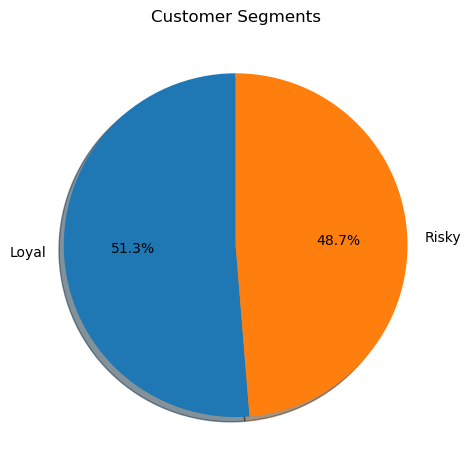

In [61]:
features_df['kmeans_label'].value_counts().plot.pie(autopct='%1.1f%%', 
                                             labels=['Loyal', 'Risky'], 
                                             title='Customer Segments',
                                             startangle=90, 
                                             shadow=True)
plt.ylabel('')
plt.tight_layout()
plt.show()

INSIGHT: What was interesting from this analysis was that 65% of the loyal customers had churned, which is unexpected. This highlights the need to give more importance to understanding why previously engaged customers are dropping off and to focus on re-engagement strategies for this group.

In [40]:
customer_offers = bank.groupby("CustomerID")["RecommendedOffer"].first().reset_index()


In [41]:

loyal_churned = features_df[(features_df["kmeans_label"] == "Loyal") & (features_df["churn"] == 1)]

analysis_df = loyal_churned.merge(customer_offers, on="CustomerID", how="left")

offer_counts = analysis_df["RecommendedOffer"].value_counts()
print(offer_counts)


RecommendedOffer
Mid-tier Savings Booster             712
Premium Investment Services          468
Financial Literacy Program Access    444
Exclusive Platinum Package           293
Gold Card with Travel Benefits       243
Personal Loan Cashback Offer         228
No-Fee Basic Account                 134
Name: count, dtype: int64


In [42]:
analysis_df

,CustomerID,transaction_count,product_count,tenure_days,late_payment,CustomerScore,logic_score,churn,kmeans_cluster,kmeans_label,RecommendedOffer
0,1004,3,3,216,-0.00,671.666667,0.463904,1,1,Loyal,Mid-tier Savings Booster
1,1009,3,2,380,-0.00,687.000000,0.465437,1,1,Loyal,Mid-tier Savings Booster
2,1011,5,2,723,-0.00,504.800000,0.564675,1,1,Loyal,No-Fee Basic Account
3,1012,3,3,530,-0.00,467.333333,0.498722,1,1,Loyal,Financial Literacy Program Access
4,1016,5,4,465,-0.00,538.400000,0.599374,1,1,Loyal,Financial Literacy Program Access
...,...,...,...,...,...,...,...,...,...,...,...
2517,9984,4,4,484,-69.38,523.500000,0.561737,1,1,Loyal,Premium Investment Services
2518,9988,5,3,615,-0.00,653.200000,0.624043,1,1,Loyal,Premium Investment Services
2519,9995,4,4,263,-114.76,536.750000,0.492367,1,1,Loyal,Mid-tier Savings Booster
2520,9997,3,3,493,-0.00,446.666667,0.482394,1,1,Loyal,Premium Investment Services


In [43]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         2522 non-null   int64  
 1   transaction_count  2522 non-null   int64  
 2   product_count      2522 non-null   int64  
 3   tenure_days        2522 non-null   int64  
 4   late_payment       2522 non-null   float64
 5   CustomerScore      2522 non-null   float64
 6   logic_score        2522 non-null   float64
 7   churn              2522 non-null   int32  
 8   kmeans_cluster     2522 non-null   int32  
 9   kmeans_label       2522 non-null   object 
 10  RecommendedOffer   2522 non-null   object 
dtypes: float64(3), int32(2), int64(4), object(2)
memory usage: 197.2+ KB


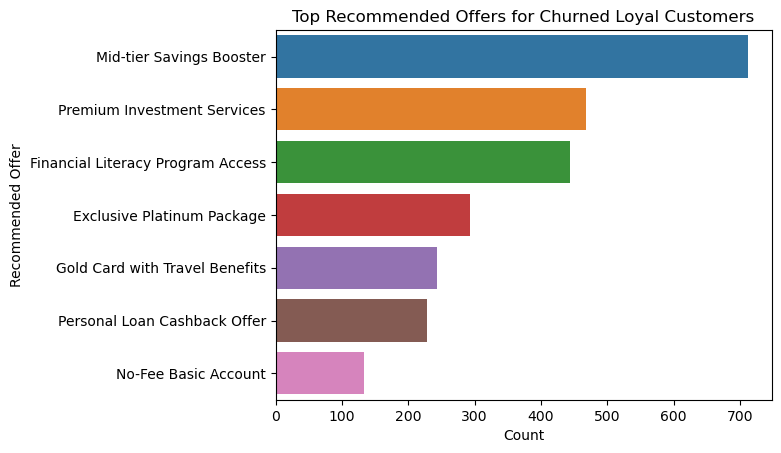

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=analysis_df, y="RecommendedOffer", order=analysis_df["RecommendedOffer"].value_counts().index)
plt.title("Top Recommended Offers for Churned Loyal Customers")
plt.xlabel("Count")
plt.ylabel("Recommended Offer")
plt.show()


Insight: High-value offers alone (like investment services or travel benefits) may not guarantee retention. This indicates a potential mismatch between customer needs and recommended products, highlighting the importance of more personalized, behavior-driven recommendations for loyal customers.

In [45]:
recent_offers = (
    bank.sort_values("TransactionDate")
    .groupby("CustomerID")["RecommendedOffer"]
    .last()
    .reset_index()
)


In [46]:
features_df = features_df.merge(recent_offers, on="CustomerID", how="left")


features_df


,CustomerID,transaction_count,product_count,tenure_days,late_payment,CustomerScore,logic_score,churn,kmeans_cluster,kmeans_label,RecommendedOffer
0,1000,1,1,0,-0.00,399.000000,0.177049,1,0,Risky,Financial Literacy Program Access
1,1001,5,3,731,-0.00,445.000000,0.600645,0,1,Loyal,Financial Literacy Program Access
2,1002,2,2,106,-0.00,650.000000,0.351229,1,0,Risky,Mid-tier Savings Booster
3,1003,1,1,0,-0.00,821.000000,0.292350,0,0,Risky,Personal Loan Cashback Offer
4,1004,3,3,216,-0.00,671.666667,0.463904,1,1,Loyal,Mid-tier Savings Booster
...,...,...,...,...,...,...,...,...,...,...,...
8020,9994,2,2,101,-0.00,569.500000,0.327791,1,0,Risky,Exclusive Platinum Package
8021,9995,4,4,263,-114.76,536.750000,0.492367,1,1,Loyal,Mid-tier Savings Booster
8022,9996,3,3,436,-0.00,419.333333,0.458471,0,1,Loyal,Premium Investment Services
8023,9997,3,3,493,-0.00,446.666667,0.482394,1,1,Loyal,Financial Literacy Program Access


In [47]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         8025 non-null   int64  
 1   transaction_count  8025 non-null   int64  
 2   product_count      8025 non-null   int64  
 3   tenure_days        8025 non-null   int64  
 4   late_payment       8025 non-null   float64
 5   CustomerScore      8025 non-null   float64
 6   logic_score        8025 non-null   float64
 7   churn              8025 non-null   int32  
 8   kmeans_cluster     8025 non-null   int32  
 9   kmeans_label       8025 non-null   object 
 10  RecommendedOffer   8025 non-null   object 
dtypes: float64(3), int32(2), int64(4), object(2)
memory usage: 627.1+ KB


In [48]:
pd.crosstab(features_df["RecommendedOffer"], features_df["churn"], normalize='index')

churn,0,1
RecommendedOffer,,
Exclusive Platinum Package,0.246083,0.753917
Financial Literacy Program Access,0.218341,0.781659
Gold Card with Travel Benefits,0.234818,0.765182
Mid-tier Savings Booster,0.233444,0.766556
No-Fee Basic Account,0.213720,0.786280
Personal Loan Cashback Offer,0.226978,0.773022
Premium Investment Services,0.248096,0.751904


INSIGHT:The high churn rates across all recommended offers,each above 75% indicate that the current recommendation system is ineffective. The offers are likely misaligned with customer needs and are failing to drive retention.

In [49]:
recent_segments = (
    bank.sort_values("TransactionDate")
    .groupby("CustomerID")["CustomerSegment"]
    .last()
    .reset_index()
)

In [50]:
features_df = features_df.merge(recent_segments, on="CustomerID", how="left")

In [51]:
features_df

,CustomerID,transaction_count,product_count,tenure_days,late_payment,CustomerScore,logic_score,churn,kmeans_cluster,kmeans_label,RecommendedOffer,CustomerSegment
0,1000,1,1,0,-0.00,399.000000,0.177049,1,0,Risky,Financial Literacy Program Access,Low Income Segment
1,1001,5,3,731,-0.00,445.000000,0.600645,0,1,Loyal,Financial Literacy Program Access,Low Income Segment
2,1002,2,2,106,-0.00,650.000000,0.351229,1,0,Risky,Mid-tier Savings Booster,Middle Income Segment
3,1003,1,1,0,-0.00,821.000000,0.292350,0,0,Risky,Personal Loan Cashback Offer,Middle Income Segment
4,1004,3,3,216,-0.00,671.666667,0.463904,1,1,Loyal,Mid-tier Savings Booster,Middle Income Segment
...,...,...,...,...,...,...,...,...,...,...,...,...
8020,9994,2,2,101,-0.00,569.500000,0.327791,1,0,Risky,Exclusive Platinum Package,High Income Segment
8021,9995,4,4,263,-114.76,536.750000,0.492367,1,1,Loyal,Mid-tier Savings Booster,Middle Income Segment
8022,9996,3,3,436,-0.00,419.333333,0.458471,0,1,Loyal,Premium Investment Services,High Income Segment
8023,9997,3,3,493,-0.00,446.666667,0.482394,1,1,Loyal,Financial Literacy Program Access,Low Income Segment


In [52]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         8025 non-null   int64  
 1   transaction_count  8025 non-null   int64  
 2   product_count      8025 non-null   int64  
 3   tenure_days        8025 non-null   int64  
 4   late_payment       8025 non-null   float64
 5   CustomerScore      8025 non-null   float64
 6   logic_score        8025 non-null   float64
 7   churn              8025 non-null   int32  
 8   kmeans_cluster     8025 non-null   int32  
 9   kmeans_label       8025 non-null   object 
 10  RecommendedOffer   8025 non-null   object 
 11  CustomerSegment    8025 non-null   object 
dtypes: float64(3), int32(2), int64(4), object(3)
memory usage: 689.8+ KB


In [53]:
pd.crosstab(features_df["RecommendedOffer"], features_df["CustomerSegment"], normalize='index')

CustomerSegment,High Income Segment,Low Income Segment,Middle Income Segment
RecommendedOffer,,,
Exclusive Platinum Package,1.0,0.0,0.0
Financial Literacy Program Access,0.0,1.0,0.0
Gold Card with Travel Benefits,0.0,0.0,1.0
Mid-tier Savings Booster,0.0,0.0,1.0
No-Fee Basic Account,0.0,1.0,0.0
Personal Loan Cashback Offer,0.0,0.0,1.0
Premium Investment Services,1.0,0.0,0.0


INSIGHT: The recommendation system assigns only one offer per income segment, showing no personalization. This rigid, one-size-fits-all approach likely contributes to poor engagement and high churn. Recommendations should be more dynamic and behavior-driven to better match individual customer needs.

In [54]:
def improved_offer_recommender(row):
    # Churned customers - try to re-engage
    if row["churn"] == 1:
        if row["CustomerSegment"] == "Low Income Segment" or row["CustomerScore"] < 600:
            return "Financial Literacy Program Access"
        elif row["CustomerSegment"] == "Middle Income Segment":
            return "Mid-tier Savings Booster"
        else:
            return "No-Fee Basic Account"
    
    # Risky but active customers, retain with low-cost or useful offers
    if row["kmeans_label"] == "Risky":
        if row["CustomerSegment"] == "Low Income Segment":
            return "No-Fee Basic Account"
        elif row["CustomerScore"] < 650:
            return "Financial Literacy Program Access"
        else:
            return "Mid-tier Savings Booster"

    # Loyal and engaged customers
    if row["kmeans_label"] == "Loyal":
        if row["CustomerSegment"] == "High Income Segment" and row["CustomerScore"] > 700:
            return "Exclusive Platinum Package"
        elif row["product_count"] >= 3:
            return "Gold Card with Travel Benefits"
        elif row["CustomerSegment"] == "Middle Income Segment":
            return "Premium Investment Services"
        else:
            return "Mid-tier Savings Booster"
   
    return "Personal Loan Cashback Offer"



In [55]:
features_df["MyRecommendation"] = features_df.apply(improved_offer_recommender, axis=1)

In [56]:
features_df

,CustomerID,transaction_count,product_count,tenure_days,late_payment,CustomerScore,logic_score,churn,kmeans_cluster,kmeans_label,RecommendedOffer,CustomerSegment,MyRecommendation
0,1000,1,1,0,-0.00,399.000000,0.177049,1,0,Risky,Financial Literacy Program Access,Low Income Segment,Financial Literacy Program Access
1,1001,5,3,731,-0.00,445.000000,0.600645,0,1,Loyal,Financial Literacy Program Access,Low Income Segment,Gold Card with Travel Benefits
2,1002,2,2,106,-0.00,650.000000,0.351229,1,0,Risky,Mid-tier Savings Booster,Middle Income Segment,Mid-tier Savings Booster
3,1003,1,1,0,-0.00,821.000000,0.292350,0,0,Risky,Personal Loan Cashback Offer,Middle Income Segment,Mid-tier Savings Booster
4,1004,3,3,216,-0.00,671.666667,0.463904,1,1,Loyal,Mid-tier Savings Booster,Middle Income Segment,Mid-tier Savings Booster
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,9994,2,2,101,-0.00,569.500000,0.327791,1,0,Risky,Exclusive Platinum Package,High Income Segment,Financial Literacy Program Access
8021,9995,4,4,263,-114.76,536.750000,0.492367,1,1,Loyal,Mid-tier Savings Booster,Middle Income Segment,Financial Literacy Program Access
8022,9996,3,3,436,-0.00,419.333333,0.458471,0,1,Loyal,Premium Investment Services,High Income Segment,Gold Card with Travel Benefits
8023,9997,3,3,493,-0.00,446.666667,0.482394,1,1,Loyal,Financial Literacy Program Access,Low Income Segment,Financial Literacy Program Access


In [57]:
pd.crosstab(features_df["MyRecommendation"], features_df["kmeans_label"], normalize='columns')

kmeans_label,Loyal,Risky
MyRecommendation,,
Exclusive Platinum Package,0.012535,0.000000
Financial Literacy Program Access,0.441545,0.646501
Gold Card with Travel Benefits,0.200819,0.000000
Mid-tier Savings Booster,0.188283,0.201895
No-Fee Basic Account,0.086979,0.151603
Premium Investment Services,0.069839,0.000000


MyRecommendation prioritizes relevant offers like Financial Literacy for both Loyal and Risky customers, while reserving premium products for Loyal ones. It is better because it adapts to customer behavior, offers variety, and avoids one-size-fits-all suggestions.

In [58]:
pd.crosstab(features_df["MyRecommendation"], features_df["churn"], normalize='index')

churn,0,1
MyRecommendation,,
Exclusive Platinum Package,1.000000,0.000000
Financial Literacy Program Access,0.060634,0.939366
Gold Card with Travel Benefits,1.000000,0.000000
Mid-tier Savings Booster,0.252712,0.747288
No-Fee Basic Account,0.113071,0.886929
Premium Investment Services,1.000000,0.000000


INSIGHT: My recommendation avoids pushing premium offers to customers who are likely to churn. Instead, it prioritizes relevant options like Financial Literacy and Mid-tier products for at-risk customers. This targeted approach shows stronger alignment with customer behavior and has more potential to improve retention.